# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# Find the table
table = soup.find('table', attrs={'class', 'table'})

rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    # Find all the cells in the row
    cells = row.find_all('td')
    # Check if the row has the expected number of cells
    if len(cells) == 7:
    # Extract data from each cell
        mars_row = {
            'id': int(cells[0].text.strip()),
            'terrestrial_date': cells[1].text.strip(),
            'sol': int(cells[2].text.strip()),
            'ls': float(cells[3].text.strip()),
            'month': int(cells[4].text.strip()),
            'min_temp': float(cells[5].text.strip()),
            'pressure': float(cells[6].text.strip())
        }
        # Append the dictionary to the list
        mars_data.append(mars_row)
    else:
        print(f"Skipping row with unexpected number of cells: {len(cells)}")

In [18]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(mars_data, columns=column_names)

In [19]:
# Confirm DataFrame was created successfully
print(mars_df.head())
print("\nDataFrame info:")
print(mars_df.info())

   id terrestrial_date  sol     ls  month  min_temp  pressure
0   2       2012-08-16   10  155.0      6     -75.0     739.0
1  13       2012-08-17   11  156.0      6     -76.0     740.0
2  24       2012-08-18   12  156.0      6     -76.0     741.0
3  35       2012-08-19   13  157.0      6     -74.0     732.0
4  46       2012-08-20   14  157.0      6     -74.0     740.0

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   float64
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 102.2+ KB
None


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [20]:
# Examine data type of each column
print(mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                  float64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [23]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [26]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
print(f"There are {num_months} months on Mars in the dataset.")

There are 12 months on Mars in the dataset.


In [30]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].nunique()
print(f"There are {num_sols} Martian sols worth of data in the dataset.")

There are 1867 Martian sols worth of data in the dataset.


In [31]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

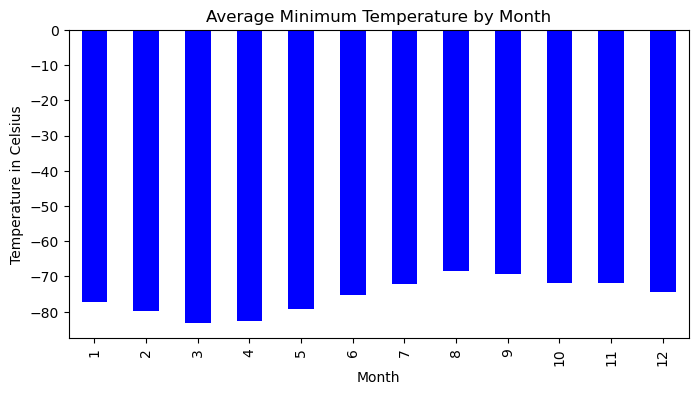

In [35]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8,4))
avg_min_temp.plot(kind='bar', color='blue')

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

In [36]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_min_temp = avg_min_temp.sort_values()
print(sorted_avg_min_temp)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Average Minimum Temperature by Month')

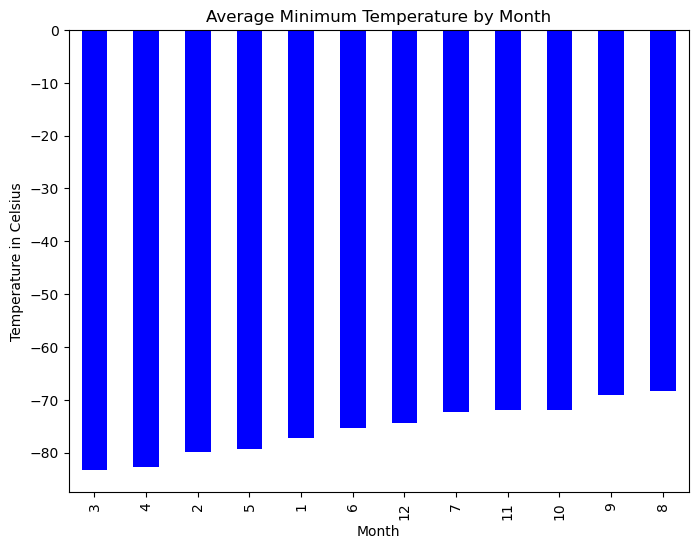

In [37]:
plt.figure(figsize=(8,6))
sorted_avg_min_temp.plot(kind='bar', color='blue')

plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

In [38]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()

print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Average Pressure by Month')

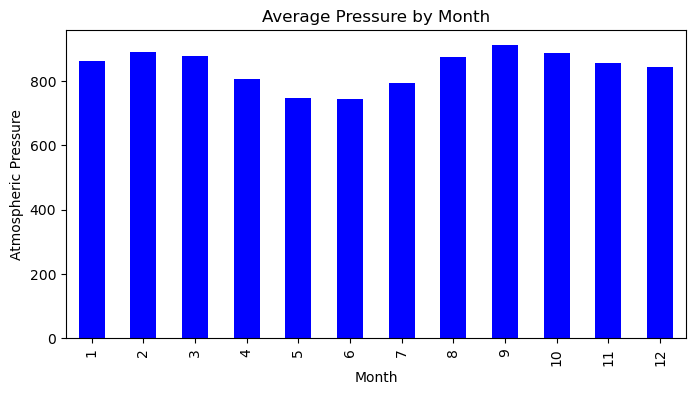

In [40]:
# Plot the average pressure by month
plt.figure(figsize=(8,4))
avg_pressure.plot(kind='bar', color='blue')

plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure.sort_values()

print(sorted_avg_pressure)

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


Text(0.5, 1.0, 'Average Atmospheric Pressure by Month')

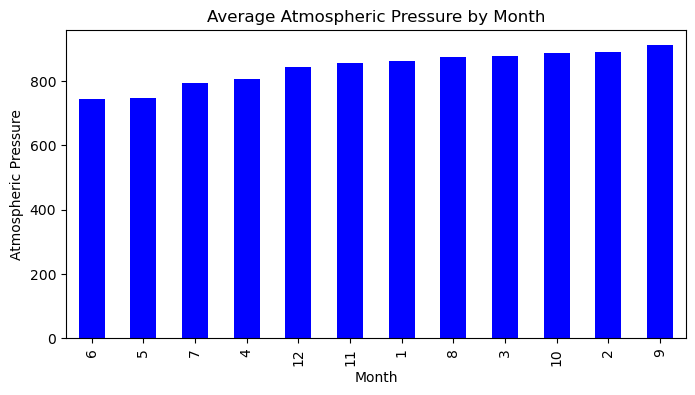

In [43]:
# Plot the average pressure by month
plt.figure(figsize=(8,4))
sorted_avg_pressure.plot(kind='bar', color='blue')

plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')

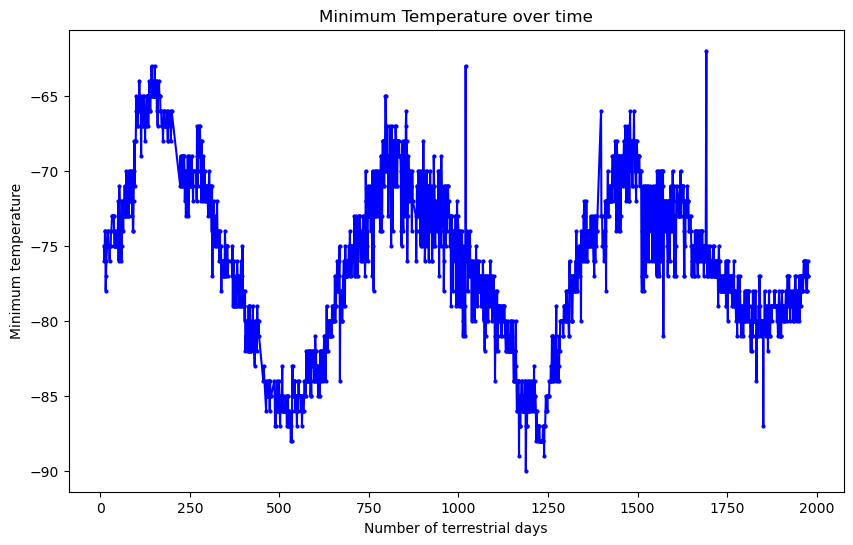

In [46]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10,6))
plt.plot(mars_df['sol'], mars_df['min_temp'], color='blue', marker='o', linestyle='-', markersize=2)

plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over time')

plt.show()

In [51]:
# Estimate length of a Martian year in sols from the graph
martian_year_sols = 600

# Convert sols to Earth days by multiply the convert factor 1.027491 (Mars sol-Wikipedia)
earth_days_in_martian_year = martian_year_sols * 1.027491

earth_days_in_martian_year

616.4946

#### Minimum Temperature

Month 3 has the lowest average minimum temperature of -83.307292, making it the coldest month.

#### Atmospheric Pressure

Month 6 has the lowest average pressure, month 9 has the highest average atmospheric pressure

#### Year Length

From eye balling the chart, it shows that roughly the patterns repeats in about 600 days, then we can convert it to Earth days by multiple the sols with the convert factor of 1.027491, resulting an Earth day of 616 days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data.csv')

In [52]:
browser.quit()